In [30]:
import numpy as np
import pandas as pd
import tensorflow as tf
import keras.preprocessing.image
import sklearn.model_selection
import sklearn.metrics
import sklearn.linear_model
import sklearn.naive_bayes
import sklearn.tree
import sklearn.ensemble
import os
import datetime

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline

Analyze data

In [10]:
# load data
data_df = pd.read_csv('./train.csv')
print("Train.csv loaded: data_df({0[0]}, {0[1]})".format(data_df.shape))

Train.csv loaded: data_df(42000, 785)


In [11]:
print(data_df.isnull().any().describe())

count       785
unique        1
top       False
freq        785
dtype: object


In [15]:
print('distince labels ', data_df['label'].unique())
print(data_df['label'].value_counts())

distince labels  [1 0 4 7 3 5 8 9 2 6]
1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64


Normalize data and split into training and validation sets

In [18]:
def normalize_data(data):
    data = data/255.0
    return data

In [19]:
def dense_to_one_hot(labels_dense, num_classes):
    num_labels = labels_dense.shape[0]
    index_offset = np.arange(num_labels) * num_classes
    labels_one_hot = np.zeros((num_labels, num_classes))
    labels_one_hot.flat[index_offset + labels_dense.ravel()] = 1
    return labels_one_hot

In [20]:
def one_hot_to_dense(labels_one_hot):
    return np.argmax(labels_one_hot, 1)

In [21]:
def accuracy_from_dense_labels(y_target, y_pred):
    y_target = y_target.reshape(-1, )
    y_pred = one_hot_to_dense(y_pred).reshape(-1, )
    return np.mean(y_target == y_pred)

In [23]:
x_train_valid = data_df.iloc[:, 1:].values.reshape(-1, 28, 28, 1).astype(np.float)
x_train_valid = normalize_data(x_train_valid)
image_width = image_height = 28
image_size = 784


In [25]:
y_train_valid_labels = data_df.iloc[:, 0].values
labels_count = np.unique(y_train_valid_labels).shape[0]

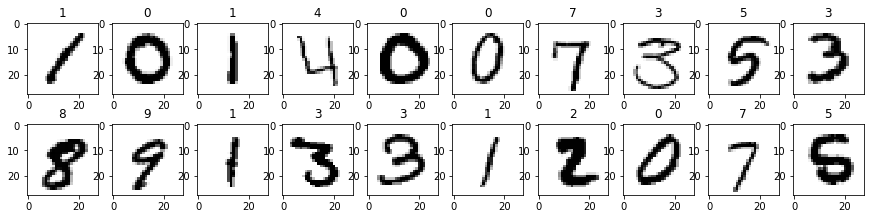

In [31]:
plt.figure(figsize=(15, 9))
for i in range(20):
    plt.subplot(5, 10, 1+i)
    plt.title(y_train_valid_labels[i])
    plt.imshow(x_train_valid[i].reshape(28, 28), cmap=cm.binary)

In [ ]:
logreg = sklearn.linear_model.LogisticRegression(verbose=0, solver='lbfgs')